# Assignment 2: Regression and classification

Authors: Kevin To and Filip Cederqvist

Work load: 15h each

Note: The dataset in question 1 have been gathered from www.hemnet.se

## 1: Hemnet dataset

a) Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe what you did and explain why.

In [14]:
# Importing packages

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
# Import data
df = pd.read_csv("./Datasets/data_assignment2.csv")
display(df[['Living_area', 'Selling_price']].head())

,Living_area,Selling_price
0,104,4600000
1,99,4450000
2,133,4900000
3,175,6625000
4,118,4600000


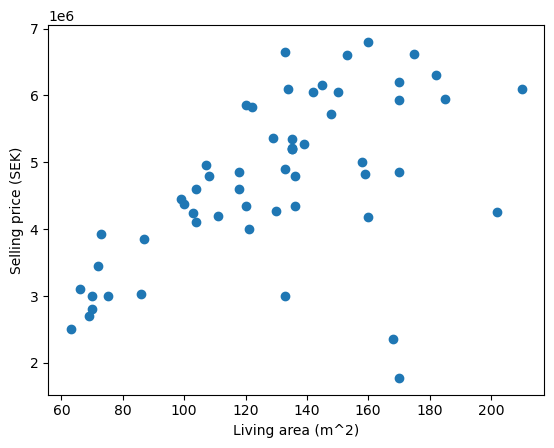

In [16]:
# Scatter plot
xvalues=df['Living_area']
yvalues=df['Selling_price']

plt.xlabel('Living area (m^2)')
plt.ylabel('Selling price (SEK)')

plt.scatter(xvalues,yvalues)
plt.show()

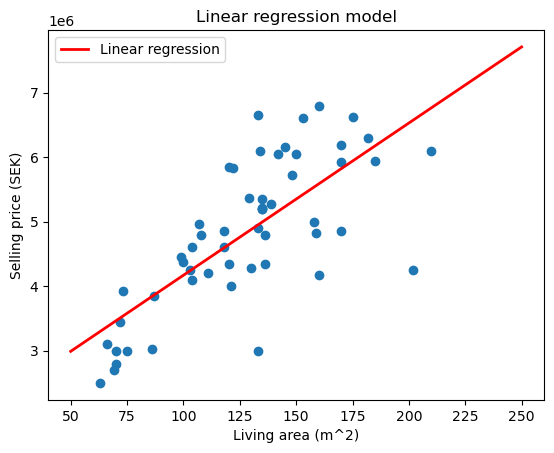

In [17]:
# Dropping the outliers which seems to have some other factor affecting the price in a dramatic way

df = df.drop(axis=0, index=40)
df = df.drop(axis=0, index=45)
df.reset_index(drop=True, inplace=True)

# Scatter plot
xvalues=df['Living_area']
yvalues=df['Selling_price']

plt.xlabel('Living area (m^2)')
plt.ylabel('Selling price (SEK)')

plt.scatter(xvalues,yvalues)

# Fitting a linear regression model
model = LinearRegression().fit(xvalues.array.reshape(-1,1), yvalues.array.reshape(-1,1))
xfit = np.linspace(50, 250, 1000) #1000 evenly spaced points in [0, 55].
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, color='red', linewidth=2, label='Linear regression')

plt.title('Linear regression model')
plt.legend()
plt.show()

b) What are the values of the slope and intercept of the regression line?

In [18]:
slope = model.coef_
print("The slope of the regression line is:",str(slope[0][0]))
intercept = model.intercept_
print("The intercepet of the regression line is:",str(intercept[0]))

The slope of the regression line is: 23597.794749444976
The intercepet of the regression line is: 1809821.2159409611


c) Use this model to predict the selling prices of houses which have living area 10 m2, 100 m2, 150 m2, 200 m2, 1000 m2

In [19]:

square_meters = [10,100,150,200,1000]

for value in square_meters:
    print("The price for a house with",str(value),"m^2 is:",str(round(model.predict([[value]])[0][0],0)), "SEK")


The price for a house with 10 m^2 is: 2045799.0 SEK
The price for a house with 100 m^2 is: 4169601.0 SEK
The price for a house with 150 m^2 is: 5349490.0 SEK
The price for a house with 200 m^2 is: 6529380.0 SEK
The price for a house with 1000 m^2 is: 25407616.0 SEK


d) Draw a residual plot

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


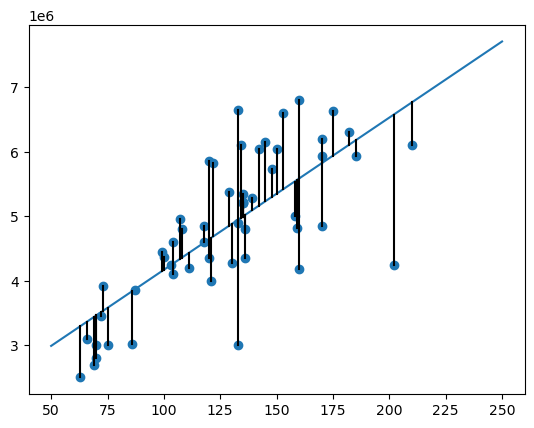

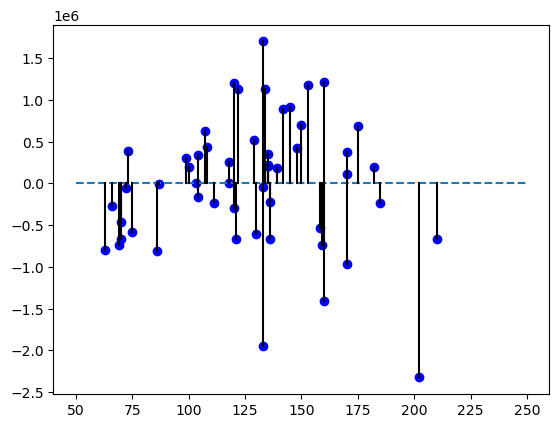

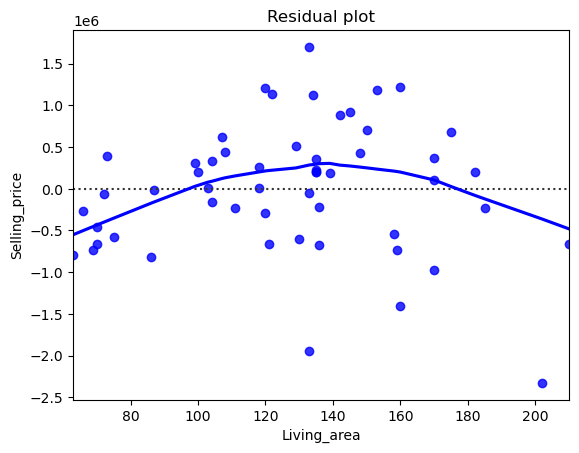

In [20]:
# Residual plot not adjusted to the x-axis
yfit_residual = model.predict(xvalues.array.reshape(-1,1))
plt.plot(xfit,yfit)
plt.scatter(xvalues,yvalues)
for i in range(0, len(xvalues)):
    plt.plot([xvalues[i], xvalues[i]], [yvalues[i], yfit_residual[i]], 'k-')
plt.show()

# Residual plot adjusted to the x-axis
plt.plot([50,250],[0,0], linestyle='dashed')
for i in range(0, len(xvalues)):
    plt.scatter(xvalues[i], yvalues[i]-yfit_residual[i], color='blue')
    plt.plot([xvalues[i], xvalues[i]], [yvalues[i]- yfit_residual[i], 0], 'k-')
plt.show()

# Residual plot with seaborn
ax = sns.residplot(x=xvalues,y=yvalues, lowess=True, color="b")
ax.set_title('Residual plot');

e) Is this a useful model? Are there any limitations? What could you do to improve the models ability to predict selling prices? Can this model be used in other areas than Landvetter?

In [21]:
from sklearn.metrics import r2_score
r2 =r2_score(yvalues, yfit_residual)
print("The R2 score is:",str(r2))

The R2 score is: 0.540158022507656


Answer: The R value is 0,54 which is not very good, but there is clearly some correlation between price and living area. But because there are many other factors at play, the linear correlation is not that clear. This does affect the usefulness of the model, however some conclusions can be drawn from the model with regards to the "square meter price". One limitation is as discussed that many other factors than living area affects the price, the state of the house, locations and plot size will also affect the price. One way to better the model is to have a bigger data set. You could also take some of the other factors into account. There is nothing in this model resetricting it to Landvetter, so it can be used in other areas aswell.

## 2: Iris dataset

1) Visualise the data. Can you gain any insights from the visualisation?

In [22]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


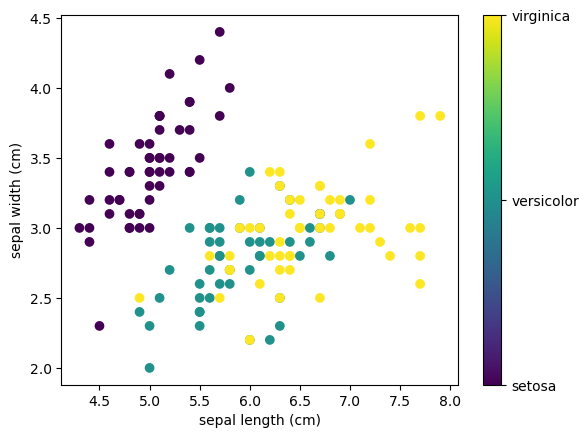

In [23]:
# Plot sepal with and length for the different flowers
x_idx = 0
y_idx = 1

plt.scatter(X[:, x_idx], X[:, y_idx], c=y)

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.xlabel(iris.feature_names[x_idx])
plt.ylabel(iris.feature_names[y_idx])

plt.show()

Answer: From the visualisation, we can see that the Setosa flowers can be clustered in their own group based on the flowers witdh and length. Versicolor and Virginica are more difficult to seperate into their own clusters, since many flowers overlap. However, one can note that Virginica more often have longer sepal length and width compared to Versicolor.

2) Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.

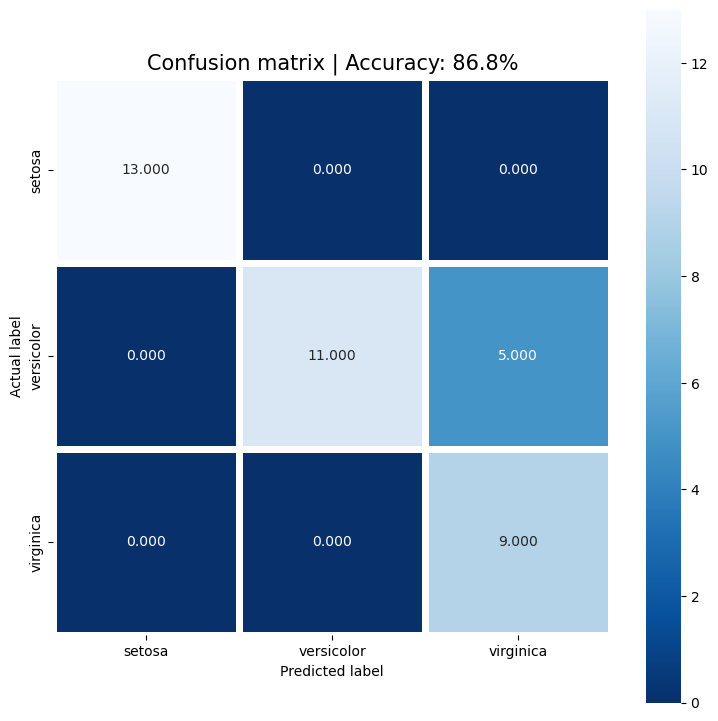

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

# Splitting into training set (75%) and test set (25%)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

# Creating model and training it
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')
logisticRegr.fit(x_train, y_train)

score = round(logisticRegr.score(x_test, y_test),3)

# Make predictions on entire test data
y_predictions = logisticRegr.predict(x_test)

cfn_mtx = metrics.confusion_matrix(y_test, y_predictions)

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cfn_mtx, annot=True, fmt=".3f", linewidths=5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.set_xticklabels(iris.target_names)
ax.set_yticklabels(iris.target_names)

all_sample_title = 'Confusion matrix | Accuracy: {0}%'.format(score*100)
plt.title(all_sample_title, size = 15);


Answer: From the confusion matrix one can see that the logistic regression algorithm is really good at classifing the Setosa and Virginica, as all predictions are correct. However, for Versicolor it performs not so good. 5 of 16 times it makes an error and incorrectly predicts it to be Virginica. In short, it is good at classifing Setosa and Virginica, but not Versicolor.

3) Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why does this happen? What do you think is the best choice of k? Compute a confusion matrix for the best uniform and distance-based classifiers.

,uniform,distance
neighbors,,
1,0.973684,0.973684
2,0.973684,0.973684
3,0.973684,0.973684
4,0.973684,0.973684
5,0.973684,0.973684
...,...,...
105,0.578947,0.973684
106,0.578947,0.973684
107,0.578947,0.973684


Text(0.5, 0, 'k (neighors)')

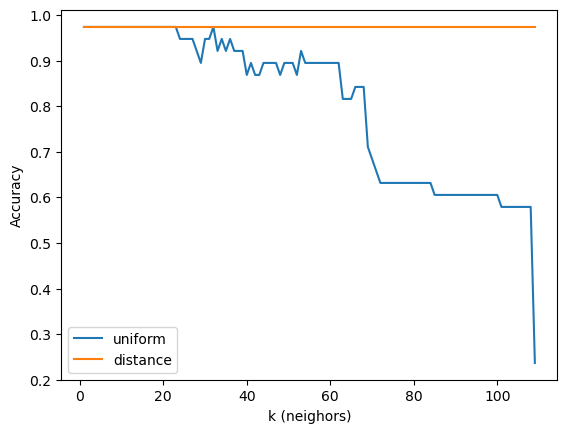

In [25]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Splitting into training set (75%) and test set (25%)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

neighbors = list(range(1,110))
acc_uni = []
acc_dis = []

for weight in ['uniform', 'distance']:
    accuracy_score = [] 
    for neighbor in neighbors:
        # Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=neighbor,weights=weight, ) 

        #Train the model using the training sets
        knn.fit(x_train, y_train)

        #Predict the response for test dataset
        y_pred = knn.predict(x_test)

        if weight == 'uniform':
            acc_uni.append(metrics.accuracy_score(y_test, y_pred))
        else:
            acc_dis.append(metrics.accuracy_score(y_test, y_pred))

df = pd.DataFrame({'neighbors':neighbors,'uniform':acc_uni,'distance':acc_dis}).set_index('neighbors')
display(df)

df.plot()
plt.ylabel('Accuracy')
plt.xlabel('k (neighors)')

Answer: As can be seen from the table and graph, when the number of k grows larger in the uniform-based case, the accuracy drops fast. This makes sense as all points in the neighbourhood are weighted equally, meaning that the points further away, which oftentimes are not correct, affect the accuracy equally as much as those close to the query point. In other words, when the number of k gets closer to the size of the dataset, the model takes all points into account, which essentially defeats the purpose of the method.

Conversely, in the distance-based case, the accuracy doesn't get affected when the number of k increases. This is because the closer neighbourshoods to the query point have a greater influnce than those further away. These will get weights that are very small and will hardly affect the accuracy. 

The best choice for k depends on if you use a uniform or distance-based model. In the uniform-based case, the best value for k in somewhere between 1-20. In the distance-based case, the value of k can be whatever.

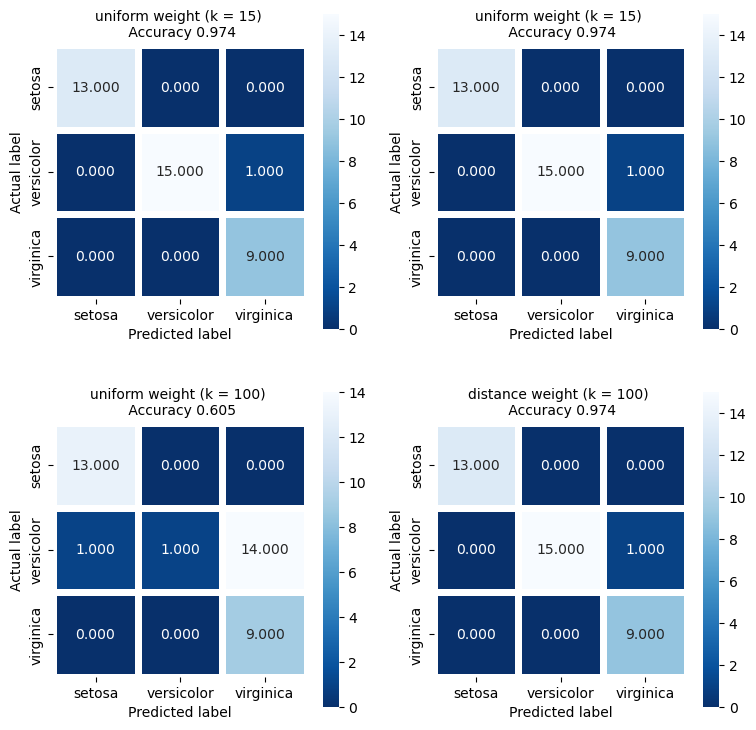

In [26]:
# Plotting the confusion matrices for k=15 and k=100
def confusion_matrix(k, weight):
    knn = KNeighborsClassifier(n_neighbors=k,weights=weight) 
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)
    score = round(knn.score(x_test, y_test),3)
    cfn_mtx = metrics.confusion_matrix(y_test, y_pred)

    return cfn_mtx, weight, k, score

def plot_confusion_matrix(cfn_mtx1, cfn_mtx2, cfn_mtx3, cfn_mtx4):
    # Tried doing this with a for loop but it didn't work
    
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(9,9))
    
    # Uniform k = 15
    sns.heatmap(cfn_mtx1[0], ax = ax1, annot=True, fmt=".3f", linewidths=5, square = True, cmap = 'Blues_r')
    ax1.set_ylabel('Actual label')
    ax1.set_xlabel('Predicted label')
    ax1.set_xticklabels(iris.target_names)
    ax1.set_yticklabels(iris.target_names)

    sample_title = '{0} weight (k = {1}) \n Accuracy {2}'.format(cfn_mtx1[1],cfn_mtx1[2], cfn_mtx1[3])
    ax1.set_title(sample_title, size = 10)

    # Distance k = 15
    sns.heatmap(cfn_mtx2[0], ax = ax2, annot=True, fmt=".3f", linewidths=5, square = True, cmap = 'Blues_r')
    ax2.set_ylabel('Actual label')
    ax2.set_xlabel('Predicted label')
    ax2.set_xticklabels(iris.target_names)
    ax2.set_yticklabels(iris.target_names)

    sample_title = '{0} weight (k = {1}) \n Accuracy {2}'.format(cfn_mtx2[1],cfn_mtx2[2], cfn_mtx2[3])
    ax2.set_title(sample_title, size = 10)

    # Uniform k = 100
    sns.heatmap(cfn_mtx3[0], ax = ax3, annot=True, fmt=".3f", linewidths=5, square = True, cmap = 'Blues_r')
    ax3.set_ylabel('Actual label')
    ax3.set_xlabel('Predicted label')
    ax3.set_xticklabels(iris.target_names)
    ax3.set_yticklabels(iris.target_names)
    
    sample_title = '{0} weight (k = {1}) \n Accuracy {2}'.format(cfn_mtx3[1],cfn_mtx3[2], cfn_mtx3[3])
    ax3.set_title(sample_title, size = 10)

    # Distance k = 100
    sns.heatmap(cfn_mtx4[0], ax = ax4, annot=True, fmt=".3f", linewidths=5, square = True, cmap = 'Blues_r')
    ax4.set_ylabel('Actual label')
    ax4.set_xlabel('Predicted label')
    ax4.set_xticklabels(iris.target_names)
    ax4.set_yticklabels(iris.target_names)

    sample_title = '{0} weight (k = {1}) \n Accuracy {2}'.format(cfn_mtx4[1],cfn_mtx4[2], cfn_mtx4[3])
    ax4.set_title(sample_title, size = 10)

plot_confusion_matrix(confusion_matrix(15, "uniform"),
                      confusion_matrix(15, "uniform"), 
                      confusion_matrix(100, "uniform"), 
                      confusion_matrix(100, "distance"))


4. Compare the logistic regression classifier in (a) with the k-nearest neighbour classifiers in (b). What do you observe? Are all classes equally challenging for the models to predict?

Text(0.5, 1.0, 'Distance weight (k = 100) \n Accuracy 0.974')

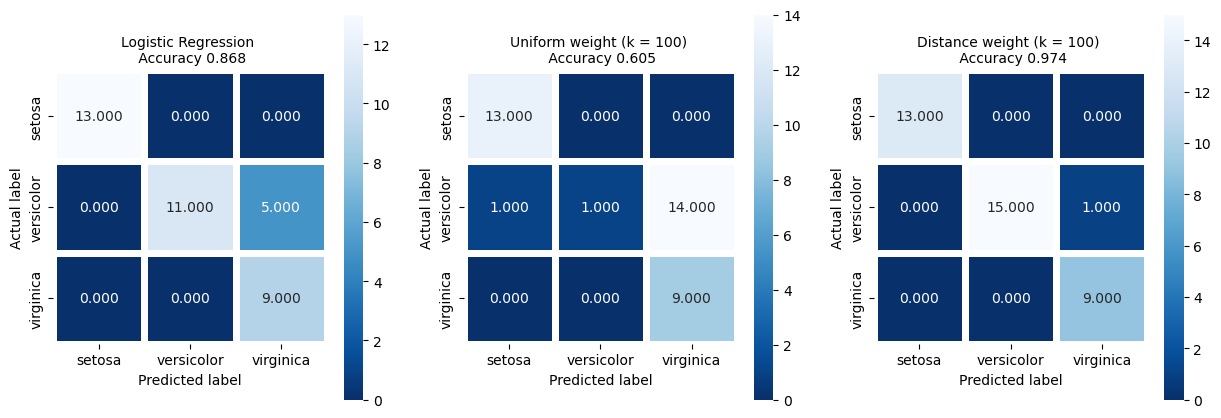

In [27]:
# Comparing the accuracy of the different models

fig, axs = plt.subplots(1,3, figsize=(15,5))

# Logistic Regression
sns.heatmap(cfn_mtx, ax = axs[0], annot=True, fmt=".3f", linewidths=5, square = True, cmap = 'Blues_r')
axs[0].set_ylabel('Actual label')
axs[0].set_xlabel('Predicted label')
axs[0].set_xticklabels(iris.target_names)
axs[0].set_yticklabels(iris.target_names)

sample_title = '{0} \n Accuracy {1}'.format("Logistic Regression", score)
axs[0].set_title(sample_title, size = 10)

# KNN Uniform
sns.heatmap(confusion_matrix(100, "uniform")[0], ax = axs[1], annot=True, fmt=".3f", linewidths=5, square = True, cmap = 'Blues_r')
axs[1].set_ylabel('Actual label')
axs[1].set_xlabel('Predicted label')
axs[1].set_xticklabels(iris.target_names)
axs[1].set_yticklabels(iris.target_names)

sample_title = '{0} weight (k = {1}) \n Accuracy {2}'.format("Uniform", "100", confusion_matrix(100, "uniform")[3])
axs[1].set_title(sample_title, size = 10)

# KNN Distance
sns.heatmap(confusion_matrix(100, "distance")[0], ax = axs[2], annot=True, fmt=".3f", linewidths=5, square = True, cmap = 'Blues_r')
axs[2].set_ylabel('Actual label')
axs[2].set_xlabel('Predicted label')
axs[2].set_xticklabels(iris.target_names)
axs[2].set_yticklabels(iris.target_names)

sample_title = '{0} weight (k = {1}) \n Accuracy {2}'.format("Distance", "100", confusion_matrix(100, "distance")[3])
axs[2].set_title(sample_title, size = 10)

Answer: When comparing the the logisstic regression classifer with the k-nearest neighbour classifiers, we can note that the accuracy is better for KNN-nearest neighbor in the distance-based case, 97.4% vs 86.8%. However, in the uniform-based case, the model performs worse than the logistic regression due to the number of neighbours being high. 

From the confusion matrixes we can also note that all models have a hard time classifing Versicolor, as it is the flower where all models predicts it wrongly.